## Analyzing the World Happiness Data

### Visualizing patterns and relationships within the data



In this exercise, we will use visualization techniques to examine patterns and relationships in the WHR data.

We'll repeat here some of the code developed in a previous exercise so that we can continue to work with the data here. Execute the next few code cells to load and reconfigure the data.  In order to make the data a bit easier to work with, we are going to rename the column headers to be shorter, using the ```df.rename``` method.  For example, what is called "Life Ladder" in the original data, we will now refer to as "Happiness"; "Log GDP per capita" is renamed as "LogGDP", etc.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [2]:
dfraw = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name='Table2.1')

In [3]:
cols_to_include = ['country', 'year', 'Life Ladder', 
                   'Positive affect','Negative affect',
                   'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 
                   'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption']
renaming = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Support', 
            'Healthy life expectancy at birth': 'Life', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative'}
df = dfraw[cols_to_include].rename(renaming, axis=1)
print(df.columns)

Index(['country', 'year', 'Happiness', 'Positive', 'Negative', 'LogGDP',
       'Support', 'Life', 'Freedom', 'Generosity', 'Corruption'],
      dtype='object')


### Step 1

Figure 1 in Appendix 1 of the WHR presents Country-by-Country trajectory plots of Happiness (Life Ladder) over time.  We can make a similar plot using some of the capabilities of the seaborn (sns) plotting package, which we have imported at the top of this notebook.

* Examine Figure 1 of [Appendix 1 of the 2018 World Happiness Report](https://s3.amazonaws.com/happiness-report/2018/Appendix1ofChapter2.pdf) in order to familiarize yourself with what you want to plot.
* You will use the ```catplot``` function in seaborn in order to plot the Happiness for each country as a function of year.  Read the [documentation](https://seaborn.pydata.org/generated/seaborn.catplot.html) for that function to see the different options.
* For your call to ```catplot```, the `x` and `y` arguments that you pass should be assigned to 'year' and 'Happiness': you want to assign 'year' to `x` and 'Happiness' to `y`.
* Less obvious from the catplot documentation is how to make a plot for each country separately. We want to make a grid of Happiness-versus-year plots.  The documentation notes that the 'row' and 'col' options can be used to indicate "categorical variables that will determine the faceting of the grid".  In our case, we want to use the country name in order to lay out the grid (i.e., to determine the faceting), and we want to proceed through the countries by laying them out in adjacent columns.  Therefore, we want to pass the option ```col='country'``` to catplot.
* Enter and evaluate a call to ```sns.catplot``` to make this group of plots, and assign the result of the operation to the variable ```plot```, since you will want to manipulate the plot further.  The following additional options to ```catplot``` might be useful to make the plot look something like what is in Figure 1 of Appendix 1:
<pre>
col_wrap=3, data=df, kind="bar", height=2.0, aspect=2.5, color='b', sharex=False, sharey=False
</pre>
* To make the catplot appear more like what is presented in Figure 1, enter and execute the following code to manipulate the ```plot``` variable that you stored, which will set the title of each plot to be the country name, and the set of tick labels on the x-axis to be spaced every other year:
<pre>
plot.set_titles("{col_name}")
plot.set_xticklabels(['2005',' ','2007',' ','2009',' ','2011',' ','2013',' ','2015',' ','2017'])
</pre>
* The plot will be rather long, since there are a lot of countries, and will probably be enclosed in a scrollable sub-window rather than rendered in its entirety in the notebook as is usually the case. If you'd like to be able to expand the sub-window and get the figure embedded fully within the notebook, you can click on the panel to the left of the figure (under the Out[] indicator, i.e., to the left but still within the notebook). If you decide you want to convert it back again to a scrollable sub-window, you can click in that left panel again to toggle back to that view.

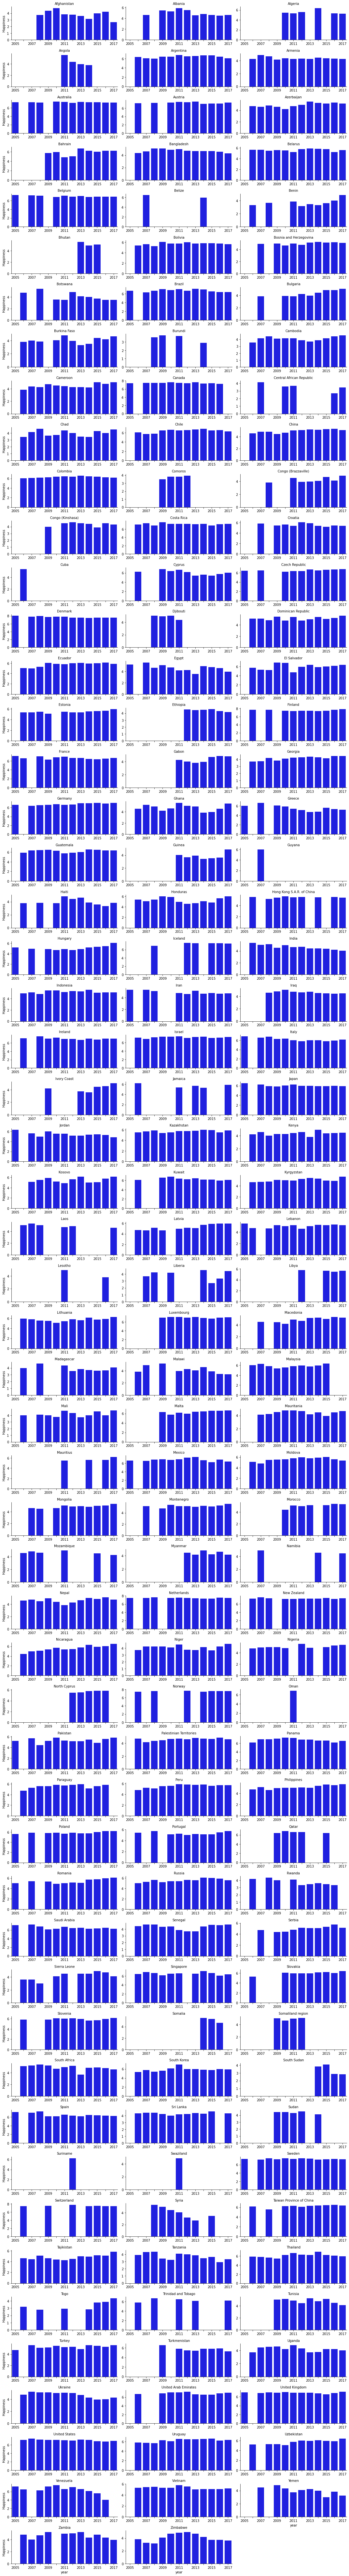

In [12]:
plot = sns.catplot(x = 'year', y= 'Happiness', col='country', col_wrap=3, data=df, kind="bar", height=2.0, aspect=2.5, color='b', sharex=False, sharey=False)
plot.set_titles("{col_name}")
plot.set_xticklabels(['2005',' ','2007',' ','2009',' ','2011',' ','2013',' ','2015',' ','2017'])
plot

### Step 2

In multivariate data sets, it is often useful to get a perspective on how different parts of the data relate to one another.  A useful technique for visualizing all the pairwise relationships among variables is a grid of scatterplots for each pair of variables.  Seaborn provides a convenient function (```sns.pairplot```) for generating such a figure.

Examine the [documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for ```sns.pairplot``` to see what options are available.  The resulting plot will contain scatterplots on all the off-diagonal cells of the grid, and histograms or kernel density plots along the diagonals for each individual variable.

The World Happiness Report is interested in how a set of <i>explanatory variables</i> relate to Happiness; these explanatory variables are (in our new naming scheme): 'LogGDP', 'Support', 'Life', 'Freedom', 'Generosity', and 'Corruption'.  Therefore, we are most interested in the pairwise relationships among Happiness and these 6 explanatory variables.  By default, the pairplot function shows pairwise relationships among all columns in a dataframe, but we can restrict that to include just a subset of columns by passing in a list of column names with the ```vars``` option.  In our case, we will want to consider a ```vars``` list containing 7 items: Happiness plus the 6 explanatory variables. 

In the code cell below:

* Define a variable called ```explanatory_vars``` that contains the list of the 6 key explanatory variables.
* Define a variable called ```plot_vars``` that contains Happiness and each of the explanatory variables.  (Hint: recall that you can concatenate Python lists using the addition (```+```) operator.)
* Using ```sns.pairplot```, make a pairwise scatterplot for the WHR dataframe over the variables of interest, namely the ```plot_vars```.  To add additional information, set the ```hue``` option to reflect the year of each data point, so that trends over time might become apparent.  It will also be useful to include the options ```dropna=True``` and ```palette='Blues'```.

<b>In doing plots like this, you might occasionally see some warning messages, even if the plot is generated correctly. These warning messages will be similar to the following</b>: <img src="plotWarning.png" width=600 height=600> This is often due to minor incompatibilities among the different layers of the ecosystem.  Here we are using seaborn to make a pairplot, which uses matplotlib under the covers to do the plotting.  Matplotlib, in turn, relies  on numpy and other packages to do some of the number-crunching needed to produce the figures.  While this generally works rather smoothly, sometimes inconsistencies appear, e.g., if some default behavior is changed in one of the packages.  There are ways to suppress different types of warning messages if you want to. 

## Graded Cell

This cell is worth 100% of the grade for this assignment. <i>Note: a self-check will not accompany this assignment</i><br>
Your plot should look like this (please note: it may take a few moments for your plot to appear): <br><img src="plot.png" width=600 height=600  align="left"/>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


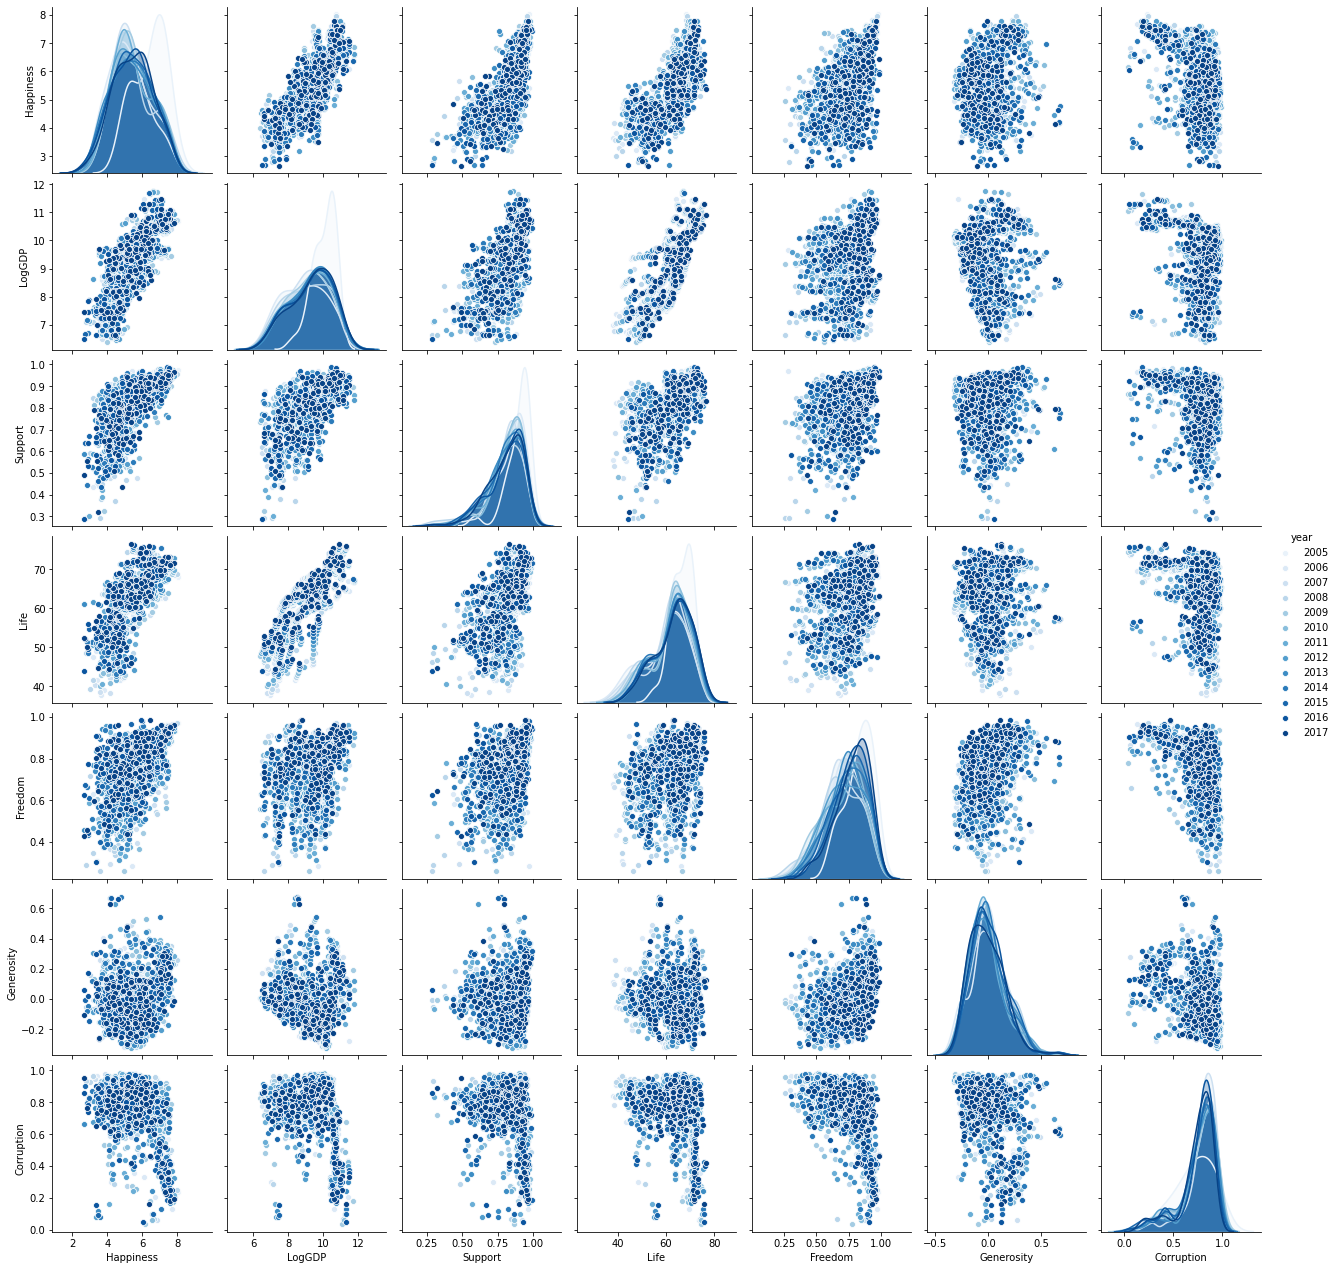

In [22]:
explanatory_vars = ['LogGDP', 'Support', 'Life', 'Freedom', 'Generosity','Corruption']

plot_vars = ['Happiness'] + explanatory_vars

sns.pairplot(df, vars = plot_vars, hue = 'year', dropna=True, palette='Blues')

By inspecting the scatterplots above, we can see that some variables (such as LogGDP, Support, and Life) show some positive correlation with Happiness, whereas other variables show little correlation.  The Corruption data appears to show something of a negative correlation with Happiness.

### Step 3.

The WHR data we are working with describes aspects of different countries on Earth, although each country is only designated by its name.  It might be worthwhile, however, to visualize some of the data on a map.  Fortunately, another Python package named ```geopandas``` is very useful for displaying data in its geographic context.  As the name suggests, ```geopandas``` is a type of geographic extension of the ```pandas``` package that we have been working with extensively.

Execute the code cell below to import geopandas and to load a representation of the geography of most countries on Earth, which we store in the variable ```world```.  The particular geographic dataset we will use (named 'naturalearth_lowres') is included as part of the `geopandas` package, which we first read in.  

Complicating matters somewhat is the fact that the 'naturalearth_lowres' dataset and the WHR dataset do not use an entirely consistent set of names for countries, which we need in order to be able to plot the WHR data in its geographic context.  Obviously the naming of countries is complicated, in that country names change over time, are subject to different interpretation or to political dispute, or are simply represented differently in different datasets.  In order to try to bring the two datasets into greater congruence, we rename some of the country names in the ```world``` dataset to be consistent with how they are included in the WHR dataset, without trying to resolve what is the correct or true name.

Note that when we print its type, we are informed ```world``` is an object of type GeoDataFrame, which is somewhat like a usual dataframe but imbued with additional understanding of geography.  Note that like the pandas DataFrame, the GeoDataFrame also supports a method named ```head```, which we call.

In the `world` geodataframe, each country is contained in a row, which contains information about the country's population, continent, estatimated GDP, and the geometry of its borders, represented as a polygon with specified vertex coordinates, or a multipolygon consisting of multiple polygons if the country contains multiple, disconnected regions.

In [23]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

country_names = {'Bosnia and Herz.': 'Bosnia and Herzegovina',
                    'Central African Rep.': 'Central African Republic',
                    'Congo': 'Congo (Brazzaville)',
                    'Dem. Rep. Congo': 'Congo (Kinshasa)',
                    'Czechia': 'Czech Republic',
                    "Côte d'Ivoire": 'Ivory Coast',
                    'Dominican Rep.': 'Dominican Republic',
                    'N. Cyprus': 'North Cyprus',
                    'Palestine': 'Palestinian Territories',
                    'Somaliland': 'Somaliland region',
                    'S. Sudan': 'South Sudan',
                    'eSwatini': 'Swaziland', 
                    'Taiwan': 'Taiwan Province of China',
                    'United States of America': 'United States'}

world = world.replace(to_replace=country_names)

print(type(world))

world.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.00,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.00,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.50,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.00,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States,USA,18560000.00,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


### Step 4.

Because both the WHR dataframe and the world geodataframe contain columns listing country names, we can use those shared names to <i>merge</i> the two in order to produce a new geodataframe containing both the geography information and the WHR data.  A dataframe merge stitches together two dataframes by matching up entries that are shared in two specified columns.  In our case, for each country, we want to connect the WHR data with the geography data, so that we can then display the WHR data in its geographic context.

Study the code in the cell below, and then execute the cell.  Pay attention to several things being done in the code below.

* The ```world``` geodataframe contains a method called ```merge``` that enables it to be merged with another dataset, which is input to the method.  In our case, we are merging ```world``` with our WHR dataframe named ```df```.
* If you examine the head of the ```world``` geodataframe above, you will notice it holds country names in a column called 'name', whereas in the ```df``` dataframe, country names are included in a column called 'country'.  It is not a requirement that the column names be identical in the two dataframes; we just need to be able to specify how they are labeled in each case.  Therefore, when we merge the two dataframes, we need to identify the names of the columns we want to merge on.  This is accomplished with the ```left_on``` and ```right_on``` options to the ```merge``` method.
* The "left" dataframe in this case is ```world```, which we are calling `merge` on, and the "right" dataframe is ```df```, which we are passing in.  So when we write ```left_on="name", right_on="country"```, we are instructing `merge` to connect entries in ```world['name']``` and ```df['country']``` that are shared.
* When we merge two dataframes, we need to specify <i>how</i> we want to consider the two sets of values that we are merging, in this case, the two sets of country names stored in each dataframe.  Because the two sets of country names might not be identical, we can indicate how we want the two sets to be combined using the ```how``` option to the merge:
    * `how = 'inner'`: an inner join that includes only those names in both dataframes (set intersection)
    * `how = 'outer'`: an outer join that includes names in either dataframe (set union)
    * `how = 'left'`: a left join that includes only those names in the left dataframe (with missing data filled in if not in left)
    * `how = 'right'`: a right join that includes only those names in the right dataframe (with missing data filled in if not in right)

* In the code below, we do an "outer" merge of the two dataframes.  Therefore, any entry that is not in one of the dataframes will have some of its columns populated by missing entries.
* Note that after we do the merge, the new dataframe ```world_with_data``` contains information about both geography and WHR data, which we can see by looking at its head.
* Note also that, as a result of the merge, the type of the 'year' data has changed.  In the original ```df``` dataframe, the years were encoded in strings (e.g., "2006").  But in the merge with ```world```, some entries do not have any year data (or Happiness data, etc.), and hence are missing.  Recall that pandas (and by extension, geopandas) represents missing numerical data with the numpy not-a-number value (```np.nan```), which is considered a floating point value (float).  Therefore, to integrate the existing year data with the missing entries, all years have been converted to floats (e.g., 2006.00).  We can still work with the data in this form, although our queries will be altered slightly to reflect the new data type.



In [24]:
world_with_data = world.merge(df, left_on='name', right_on='country', how='outer')
world_with_data.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,year,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption
0,920938.00,Oceania,Fiji,FJI,8374.00,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,53950935.00,Africa,Tanzania,TZA,150600.00,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2006.00,3.92,0.75,0.21,7.52,0.78,48.74,0.79,-0.03,0.65
2,53950935.00,Africa,Tanzania,TZA,150600.00,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2007.00,4.32,0.76,0.22,7.57,0.71,49.59,0.72,-0.02,0.71
3,53950935.00,Africa,Tanzania,TZA,150600.00,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2008.00,4.38,0.74,0.18,7.59,0.77,50.40,0.56,0.25,0.93
4,53950935.00,Africa,Tanzania,TZA,150600.00,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2009.00,3.41,0.78,0.16,7.62,0.84,51.16,0.61,0.30,0.90


### Step 5

Recall that our goal is to plot WHR indicators such as Happiness on a world map, rather than just looking at it in a table.  Now that we have merged the WHR and geography data, we can make map-based plots.  Recall that the WHR data contain multiple records for each country over several years, whereas we generally only want to plot a single variable at a time for each country on a map.  Therefore, we might choose to examine the Happiness data for a particular year, or maybe the average (mean) Happiness value over multiple years.  We will represent the Happiness data by color-coding  its value via a heatmap.  This type of plot &mdash; where a quantity is color-coded according to a heatmap on a geographic map &mdash; is known as a "chloropleth".

We want to plot a Happiness map (chloropleth) in two steps.  First, we want to draw an outline of all the countries, which geopandas can do using 'geometry' information in the `world` dataframe.  Then, we can overlay on top of that map the Happiness level in each country, color-coded via a heatmap.  The reason for doing both these steps is that we might not have Happiness data for all countries.  If we only plotted the Happiness heatmap without first drawing the outline of all the countries, any countries without Happiness data would simply appear as empty regions (i.e., part of the ocean).  By drawing all countries first in a neutral color that is not included in the Happiness heatmap, we will still be able to identify those missing countries visually.

To summarize, our two steps will be:

* First, draw an outline of all the countries from the ```world``` dataframe as a base layer
* Next, plot the Happiness data on top of the base layer

These steps are accomplished in the two lines of code in the cell below.

Execute the code cell below, and then read the remainder of this discussion to understand in more detail what the code is doing.

The first step plots all the countries in the color 'lightgray' (with darker 'gray' edges), and stores the result in a variable named ```base``` (indicating that it is a base layer for the plot).  Technically, ```base``` is an object of type ```AxesSubplot``` that matplotlib defines in order to store information about plots.  Storing this object in a variable is useful here so that we can coordinate our two map plots by plotting them on the same axes; we can accomplish this by passing ```base``` to our second plotting call.  You should also note that we increased the figure size for this plot.

The second step plots the Happiness data just for the year 2017, by filtering out the subset of the data for which ```df.year==2017```.  It then aligns the data with the underlying base layer by passing in ```base``` as the axes to use for the second plot (```ax=base```).  This plot uses a particular colormap named 'afmhot' for displaying the Happiness data, and shows a colorbar with Happiness values to the side (```legend=True```).  You should note that any country for which there is not Happiness data in the 2017 dataset is displayed in gray on this plot, due to our background plotting.

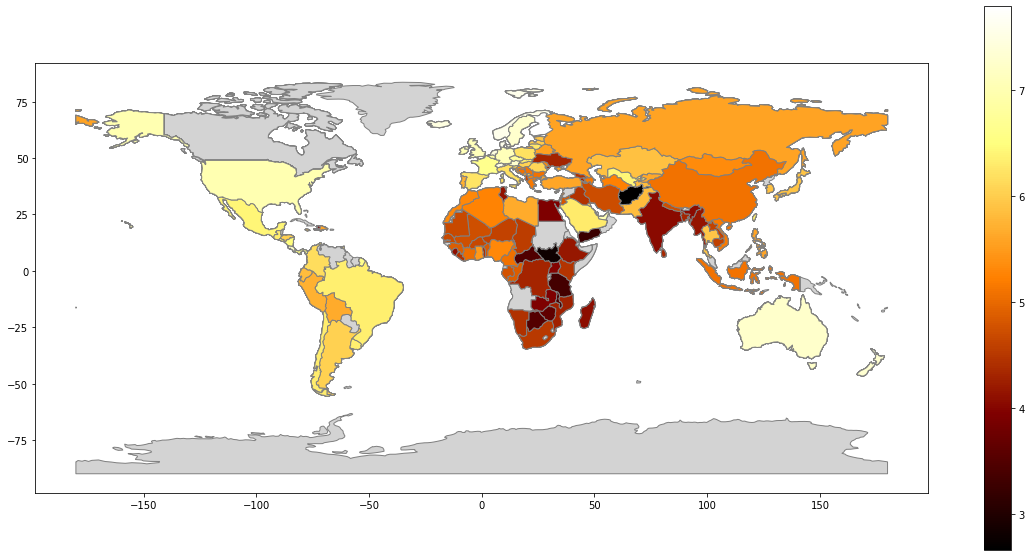

In [25]:
base = world_with_data.plot(color='lightgray', edgecolor='gray', figsize=(20,10))
world_with_data[world_with_data.year==2017].plot('Happiness', ax=base, cmap='afmhot', edgecolor='gray', legend=True)

### Step 6.

Copy and paste the code in the cell above into a new code cell below.  Whereas that figure represented the Happiness data for 2017, the ```world_with_data``` geodataframe contains much more information which you can also examine.  In the new code cell below, modify the calls to the plot methods to examine some other quantities in their geographic context, such as Corruption or LogGDP, perhaps for different years.

You can also modify other aspects of the plot, such as the colormap that is used.  The `afmhot` colormap proceeds from black at its lowest levels, up through red, orange, and yellow, culminating in white at its highest levels.  There are many colormaps available (which are provided under the covers by matplotlib, and are described in more detail [here](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).)  All of the colormaps are available in both a default and a "reverse" form (designated by adding `_r` to the end of the default name), mapping values to colors in the reverse direction.  Thus, the `afmhot_r` colormap proceeds from white at lowest levels up to black at its highest, passing through yellow, orange, and red along the way.

Enjoy your data explorations!

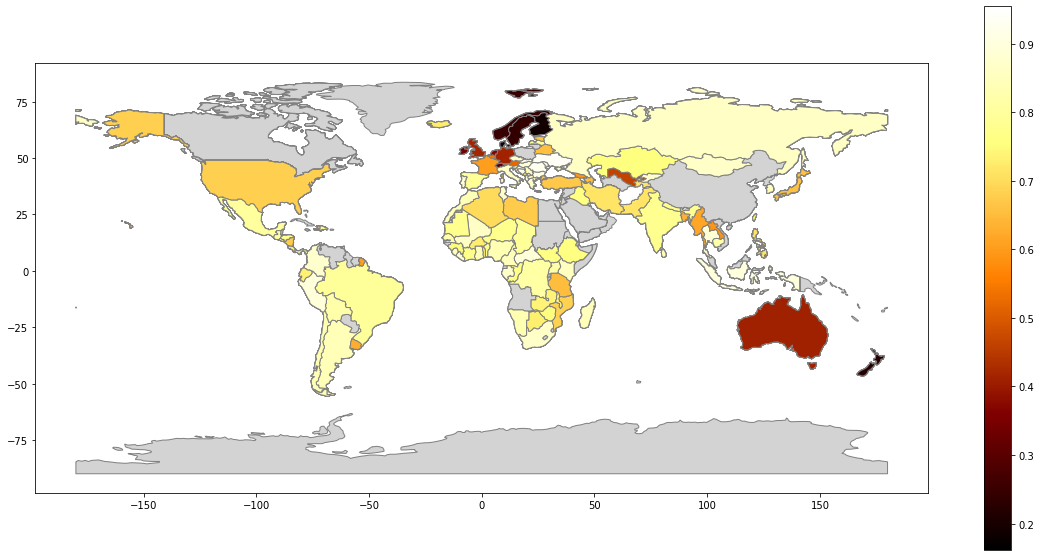

In [26]:
base = world_with_data.plot(color='lightgray', edgecolor='gray', figsize=(20,10))
world_with_data[world_with_data.year==2017].plot('Corruption', ax=base, cmap='afmhot', edgecolor='gray', legend=True)